<a href="https://colab.research.google.com/github/yonilev2003/Predicting-Heart-Disease-With-ML/blob/main/Predicting_Heart_Disease_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The project originally started as part of my CodeCademy course but later evolved into a wider-range project presented to you. Initially, I wanted to work on the same original dataset and study different aspects of the dataset, but I later decided to analyze the original untouched dataset stumbled upon.

Harnessing the power of data science and data analysis is crucial and going side by side with the fast-paced evolving medical science. Leveraging models and analysis aiming to predict the presence or absence of heart disease is a huge perk when trying to understand the #1 cause of death in the Western world.

**About the dataset:**

The dataset comprises 14 key attributes ranging from demographic information like age and sex to medical specifics such as chest pain type, resting blood pressure, etc. This rich collection of data may help predict whether people who have symptoms of heart disease do have it. The data was gained by 4 doctors from different universities globally about 920 people.

**Objective:**

The project has two main parts. First, I want to understand how people with heart disease are different from those who don't have it. Second, I'm creating models to predict if someone might have heart disease.

**The challenge:**

Working with health data is tricky. I needed to be extra careful when cleaning the dataset and making decisions regarding preparing the data for analysis. Both fitting the data into models and keeping "everything important" within the dataset is one thing, but putting people's lives on the line in the name of research is another. In the end, I wanted the project to be made as closely as I could to as if a researcher would've done the same research.

**Conclusions:**

The analysis revealed significant differences in key health indicators between individuals with and without heart disease. Factors like maximum heart rate, age, and resting blood pressure stood out. For example, even though all the patients appearing in the dataset are adults (ranging from 28 to 77 years old), the average patient with heart disease was 6 years older than a healthy patient. Later in the project, I made 4 models to predict the presence of heart disease (support vector classifier, random forest classification, neural network classification, and logistic regression). The models could predict with up to 87% precision whether a patient has or doesn't have heart disease.

# Imports and installments

In [ ]:
# Installing the Kaggle API package and keras-tuner
! pip install kaggle
! pip install keras-tuner

In [ ]:
# Installing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
import warnings
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
import keras_tuner as kt
from tensorflow import keras

# Suppressing future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Setting Kaggle API credentials
os.environ['KAGGLE_USERNAME'] = 'yonathanlevy'
os.environ['KAGGLE_KEY'] = 'd161e19bbcf37f55b9e5a0d6e5497e55'

In [ ]:
# Unzip the dataset
!unzip /content/heart-disease-data/heart-disease-data.zip -d /content/heart-disease-data

Archive:  /content/heart-disease-data/heart-disease-data.zip
replace /content/heart-disease-data/heart_disease_uci.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Loading the dataset
heart = pd.read_csv('/content/heart-disease-data/heart_disease_uci.csv')

# Looking at the first 5 rows
heart.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


The columns:

* id = identifier for the record
* age = age of the patient in years
* sex = either 'Male' or 'Female'
* dataset = source dataset (the university's research conductor)
* cp = chest pain type ('typical angina', 'atypical_angina', 'non-anginal pain', or 'asymptomatic')
* trestbps = resting blood pressure (on admission to the hosptial)
* chol = serum cholesterol in mg/dl
* fbs = whether the patient's fasting blood sugar is >120 mg/dl (1 = yes, 0 = no)
* restecg = resting electrocardiographic results
* thalch = maximum heart rate achieved in exercise test
* exang = exercise-induced angina (either True or False)
* oldpeak = ST depression induced by exercise relative to rest
* slope = slope of the peak exercise ST segment
* ca = number of major vessels colored by fluoroscopy
* thal = Thalssemia
* num = diagnosis of heart disease (angiographic disease status)

# Cleaning

In [ ]:
# Datatypes and stasitcial structure
print(heart.info())
print(heart.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None
               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  

I changed the name of the column 'num' to 'heart_disease'

According to the dataset's description, there are 5 possible values in the column 'num' indicating to the presence of heart disease (0 = absence, 1-4 = presence). I changed the possible values into 2, either 0 (absence) or 1 (presence).

In [ ]:
# Changing the name of the column 'num' to 'heart_disease'
heart.rename(columns={'num': 'heart_disease'}, inplace=True)

# Change the values to either 0 (absence) or 1 (presence)
heart['heart_disease'] = heart['heart_disease'].apply(lambda x: 1 if x >= 1 else 0)

I found 'id' and 'dataset' irrelevant so I dropped them. The column 'dataset' indicates the research university, which is irrelevant for my analysis.

In [ ]:
# Imputing irrelevant columns 'id' and 'dataset'
heart.drop(columns=['id', 'dataset'], inplace=True)

**Missing values**

I decided to drop the 3 columns with the significantly higher missing values ('ca', 'thal' and 'slope') altogether. Also, I imputed numeric columns with the median ('trestbps', 'chol', 'thalach', 'exang' and 'oldpeak').

For the columns 'fbs' and 'restecg' I wanted to display a more strategic path. The distributions for 'fbs' and 'restecg' show the following:

'fbs' (Fasting bloo sugar > 120 mg/dl): most entries are 'False'.
'restecg' (Resting electrocardiographic results): most entries are 'normal'.
Given this information, for 'fbs', it's reasonable to impute missing values with the mode ('False') and for 'restecg', I imputed missing entires with the mode ('normal').

In [ ]:
missing_percentage = (heart.isnull().sum() / len(heart)) * 100
missing_percentage

age               0.000000
sex               0.000000
cp                0.000000
trestbps          6.413043
chol              3.260870
fbs               9.782609
restecg           0.217391
thalch            5.978261
exang             5.978261
oldpeak           6.739130
slope            33.586957
ca               66.413043
thal             52.826087
heart_disease     0.000000
dtype: float64

In [ ]:
# Missing values - dropping 'ca', 'thal' and 'slope'
heart.drop(columns=['ca', 'thal', 'slope'], inplace=True)
print(heart.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'heart_disease'],
      dtype='object')


In [ ]:
# Missing values - imputing numeric columns
median_imputer = SimpleImputer(strategy='median')

# Columns to impute with median
columns_to_impute_median = ['trestbps', 'chol', 'thalch', 'exang', 'oldpeak']

# Applying the median imputation
heart[columns_to_impute_median] = median_imputer.fit_transform(heart[columns_to_impute_median])

# Checking the distribution of 'fbs' and 'restecg' to decide on the imputation strategy
distribution_fbs_restecg = heart[['fbs', 'restecg']].describe(include='all')
distribution_fbs_restecg

,fbs,restecg
count,830,918
unique,2,3
top,False,normal
freq,692,551


In [ ]:
# Imputing categorical columns with mode strategy
mode_imputer = SimpleImputer(strategy='most_frequent')

# Applying mode imputation
mode_imputing_fbs_restecg = ['fbs', 'restecg']
heart[mode_imputing_fbs_restecg] = mode_imputer.fit_transform(heart[mode_imputing_fbs_restecg])

In [ ]:
# Verifying no more missing values
heart.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalch           0
exang            0
oldpeak          0
heart_disease    0
dtype: int64

In [ ]:
# Checking for duplicates
heart.duplicated().sum()

2

In [ ]:
# Removing duplicates
heart.drop_duplicates(inplace=True)

# Visualization & Analysis

Firstly, I found that according to the dataset men are significantly more prevelant to heart disease than women.
Also, I found that people with heart disease tend to be older, have lower maximum heart ratte, higher trestbps and cholesterol levels. In the case of chest pain, most patients with heart disease suffer from asymptomatic chest pain, whereas there's a wider spread of chest pain types for patients without heart disease.

**Sex and heart disease**

Because the dataset has 725 men and 193 women, I decided to sample 40 men and 40 women before checking if either gender are significantly more sick with heart disease than the other.

The visualization below displays the percentage of heart disease prevelance by gender, with males showing a significantly higher prevalence (approximately 63.22%) compared to females (about 25.77%) in the dataset. This might indicate either biological differences, social factors, data collection bias and maybe just a coincident imbalance.

There are about 4 times more men in the dataset, which is surley imbalanced.
So I visualized both the percentage of prevelance to heart disease for the full data and a sampling of 40 men and 40 women. The sampling method as well showed that men are significantly more prevelant to heart disease. However, the other reasons I indicated for the possible imbalance are still in place.

In [ ]:
# Counting the number of male and female patients
male_count = heart[heart['sex'] == 'Male'].shape[0]
female_count = heart[heart['sex'] == 'Female'].shape[0]

# Counting the number of male and female patients with heart disease
male_hd_count = heart[(heart['sex'] == 'Male') & (heart['heart_disease'] == 1)].shape[0]
female_hd_count = heart[(heart['sex'] == 'Female') & (heart['heart_disease'] == 1)].shape[0]

# Calculating the percentage of patients with heart disease by gender
male_hd_percentage = (male_hd_count / male_count) * 100
female_hd_percentage = (female_hd_count / female_count) * 100

# Storing the percentages in a list
hd_percentages = [male_hd_percentage, female_hd_percentage]

# Calculating the difference in heart disease prevalence between genders
percentage_difference = abs(male_hd_percentage - female_hd_percentage)

male_count, female_count, male_hd_count, female_hd_count, male_hd_percentage, female_hd_percentage, percentage_difference

(725, 193, 458, 50, 63.172413793103445, 25.906735751295333, 37.265678041808115)

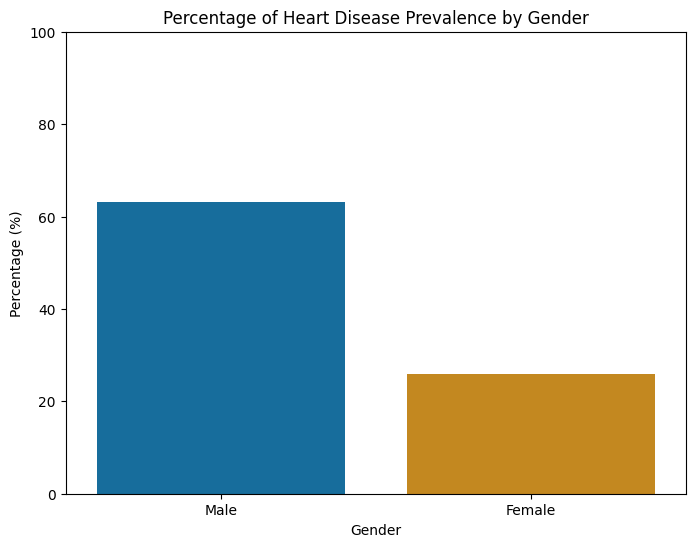

In [ ]:
# Visualizing the percentage of heart disease prevalence by gender
plt.figure(figsize=(8, 6))
sns.barplot(x=['Male', 'Female'], y=hd_percentages, palette="colorblind")
plt.title('Percentage of Heart Disease Prevalence by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.show()

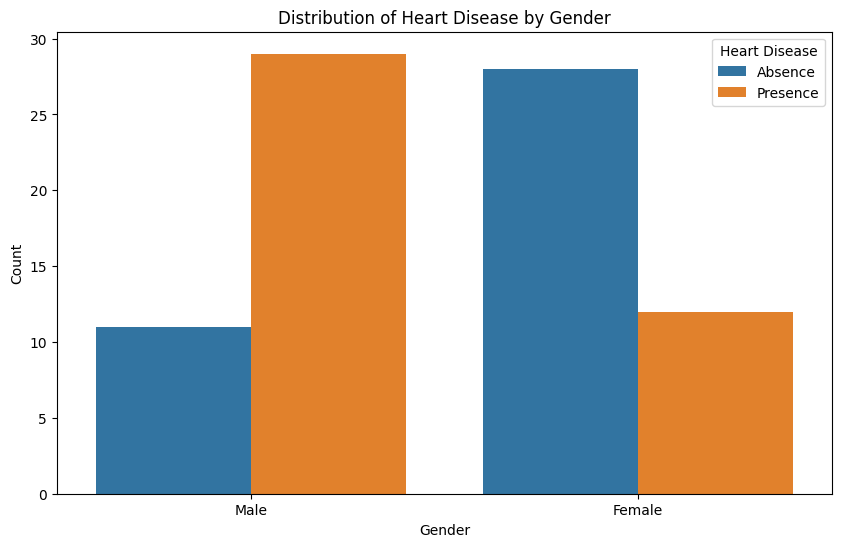

In [ ]:
# Sampling 40 men and 40 women randomly
male_sample = heart[heart['sex'] == 'Male'].sample(n=40, random_state=1)
female_sample = heart[heart['sex'] == 'Female'].sample(n=40, random_state=1)

# Combining the samples for visualization
combined_samples = pd.concat([male_sample, female_sample])

# Creating a countplot to visualize the distribution of heart disease by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='heart_disease', data=combined_samples)
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absence', 'Presence'])
plt.show()

In [ ]:
# Creating a contingency table
contingency_table = pd.crosstab(combined_samples['sex'], combined_samples['heart_disease'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2, p, dof, expected

(12.808005003126954,
 0.00034513940734469124,
 1,
 array([[19.5, 20.5],
        [19.5, 20.5]]))

**Checking the difference between the maximum heart rate ahiceved in exercise test ('thalch') of patients with or without heart disease**

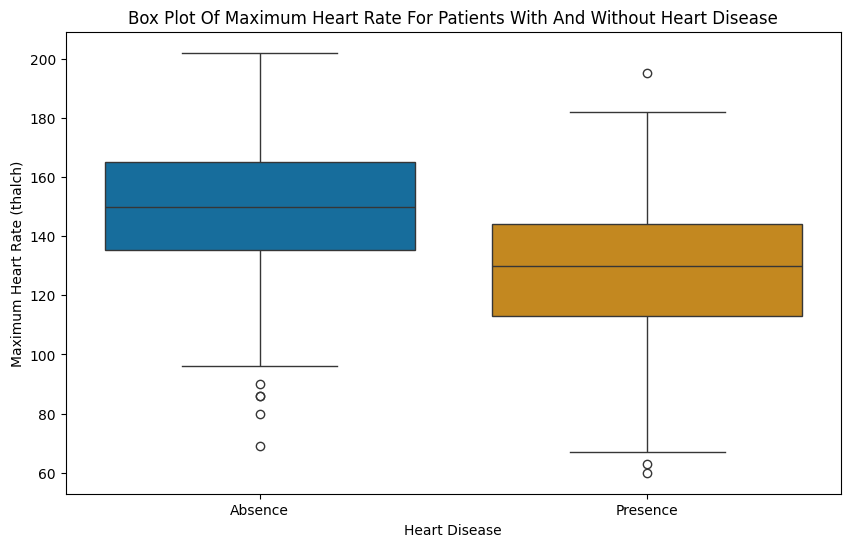

'thalch' mean difference:  19.25335125792202
'thalch' median difference:  20.0


In [ ]:
# Box plotting 'thalch' vs 'heart_disease'
plt.figure(figsize=(10, 6))
sns.boxplot(x='heart_disease', y='thalch', data=heart, palette='colorblind')
plt.title('Box Plot Of Maximum Heart Rate For Patients With And Without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate (thalch)')
plt.xticks([0, 1], ['Absence', 'Presence'])
plt.show()

# Saving 'thalch' for both patients with and without heart disease
thalch_no_hd = heart[heart['heart_disease'] == False]['thalch']
thalch_hd = heart[heart['heart_disease'] == True]['thalch']

# Calculating and printing the mean and median differences
mean_diff = np.mean(thalch_no_hd) - np.mean(thalch_hd)
print("'thalch' mean difference: ", mean_diff)
med_diff = np.median(thalch_no_hd) - np.median(thalch_hd)
print("'thalch' median difference: ", med_diff)

In [ ]:
# Running two-sample t-test
tstat, pval = ttest_ind(thalch_hd, thalch_no_hd)
alpha = 0.05

print('p-value: ', pval)
if pval < alpha:
    print("There is a significant difference in thalch between the groups with and without heart disease.")
else:
    print("There is no significant difference in thalch between the groups with and without heart disease.")

p-value:  4.8631583492433466e-33
There is a significant difference in thalch between the groups with and without heart disease.


**Checking the ages of patients with or without heart disease**

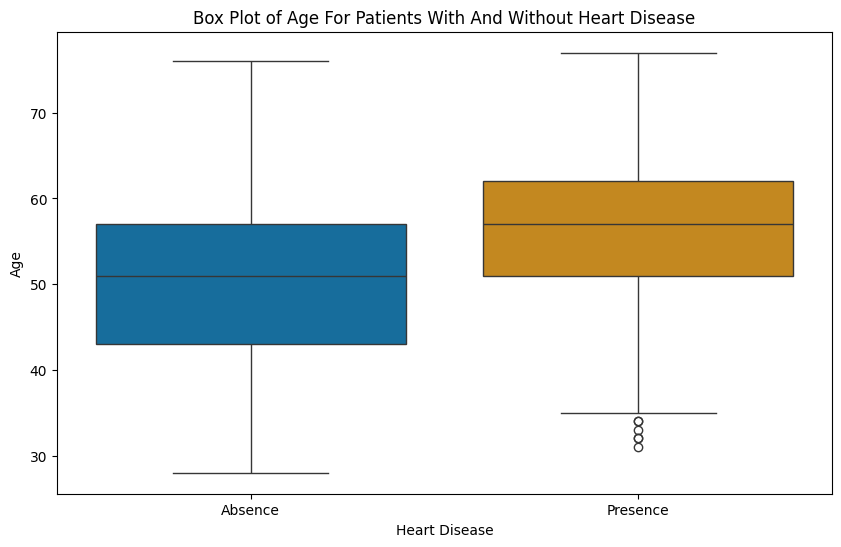

'age' mean difference:  -5.348386787017475
'age' median difference:  -6.0


In [ ]:
# Box plotting 'age' vs 'heart_disease'
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart['heart_disease'], y=heart['age'], data=heart, palette='colorblind')
plt.title('Box Plot of Age For Patients With And Without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.xticks([0, 1], ['Absence', 'Presence'])
plt.show()

# Saving 'age' for both patients with and without heart disease
age_no_hd = heart[heart['heart_disease'] == False]['age']
age_hd = heart[heart['heart_disease'] == True]['age']

# Calculating and printing the mean and median differences
mean_diff = np.mean(age_no_hd) - np.mean(age_hd)
print("'age' mean difference: ", mean_diff)
med_diff = np.median(age_no_hd) - np.median(age_hd)
print("'age' median difference: ", med_diff)

In [ ]:
# Running two-sample t-test
tstat, pval = ttest_ind(age_hd, age_no_hd)
alpha = 0.05

print('p-value: ', pval)
if pval < alpha:
    print("There is a significant difference in age between the groups with and without heart disease.")
else:
    print("There is no significant difference in age between the groups with and without heart disease.")

p-value:  3.0079532400497047e-18
There is a significant difference in age between the groups with and without heart disease.


**Visualizing the distribution of age by heart disease presence**

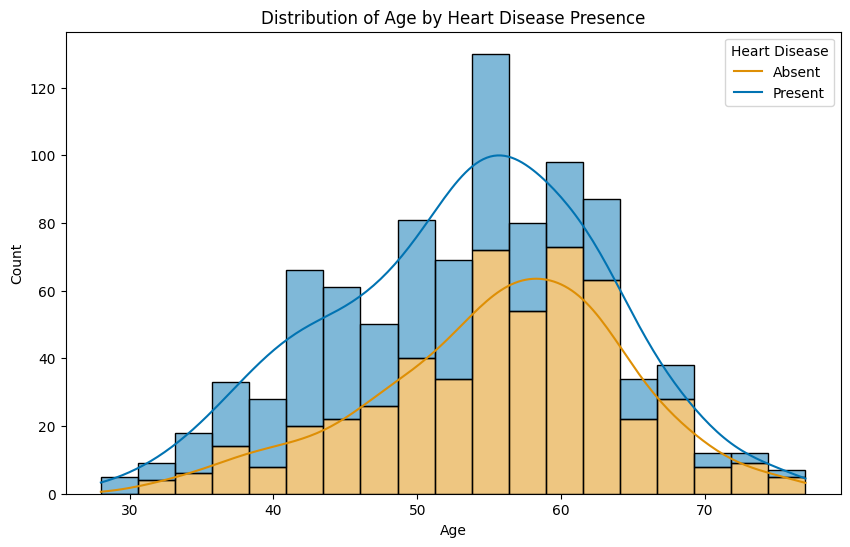

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=heart, x="age", hue="heart_disease", multiple="stack", kde=True, palette='colorblind')
plt.title('Distribution of Age by Heart Disease Presence')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Absent', 'Present'])
plt.show()

As seen in the visualization, people with heart disease tend to be older.

**Checking the difference between the resting blood pressure (mm HG) of patients with or without heart disease**

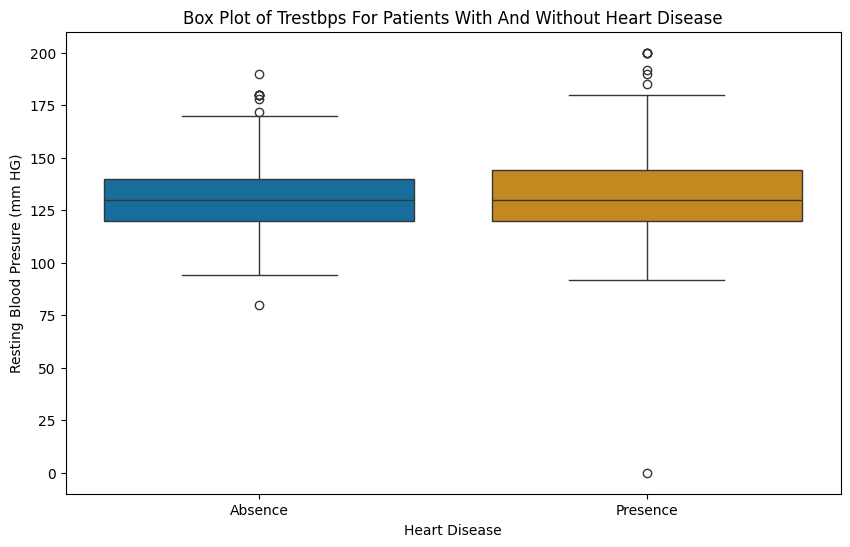

'age' mean difference:  -3.675878624927975
'age' median difference:  0.0


In [ ]:
# Box plotting 'trestbps' vs 'heart_disease'
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart['heart_disease'], y=heart['trestbps'], data=heart, palette='colorblind')
plt.title('Box Plot of Trestbps For Patients With And Without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Presure (mm HG)')
plt.xticks([0, 1], ['Absence', 'Presence'])
plt.show()

# Saving 'trestbps' for both patients with and without heart disease
trestbps_no_hd = heart[heart['heart_disease'] == False]['trestbps']
trestbps_hd = heart[heart['heart_disease'] == True]['trestbps']

# Calculating and printing the mean and median differences
mean_diff = np.mean(trestbps_no_hd) - np.mean(trestbps_hd)
print("'age' mean difference: ", mean_diff)
med_diff = np.median(trestbps_no_hd) - np.median(trestbps_hd)
print("'age' median difference: ", med_diff)

In [ ]:
# Running two-sample t-test
tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
alpha = 0.05

print('p-value: ', pval)
if pval < alpha:
    print("There is a significant difference in trestbps between the groups with and without heart disease.")
else:
    print("There is no significant difference in trestbps between the groups with and without heart disease.")

p-value:  0.002643975791075865
There is a significant difference in trestbps between the groups with and without heart disease.


**Checking the difference between the serum cholesterol in mg/dl of patients with or without heart disease**

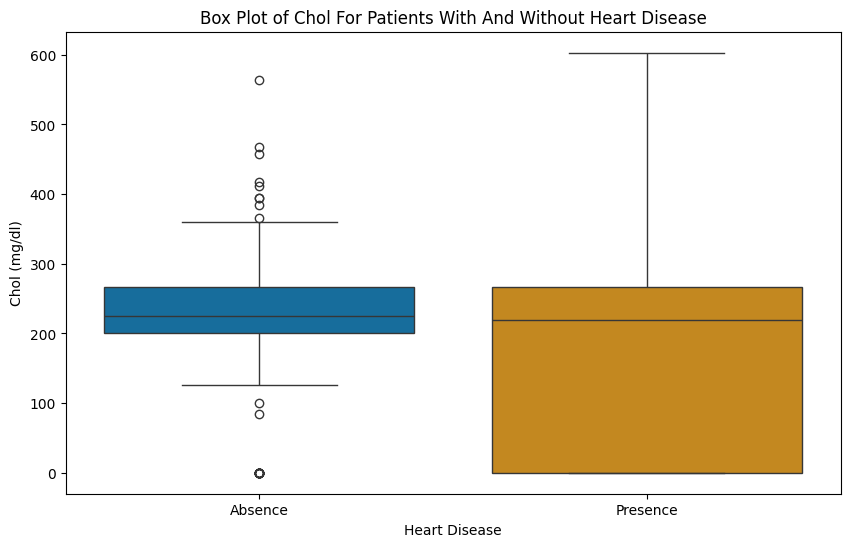

'chol' mean difference:  50.286700595352414
'chol' median difference:  6.0


In [ ]:
# Box plotting 'chol' vs 'heart_disease'
plt.figure(figsize=(10, 6))
sns.boxplot(x=heart['heart_disease'], y=heart['chol'], palette='colorblind')
plt.title('Box Plot of Chol For Patients With And Without Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Chol (mg/dl)')
plt.xticks([0, 1], ['Absence', 'Presence'])
plt.show()

# Saving 'chol' for both patients with and without heart disease
chol_no_hd = heart[heart['heart_disease'] == False]['chol']
chol_hd = heart[heart['heart_disease'] == True]['chol']

# Calculating and printing the mean and median differences
mean_diff = np.mean(chol_no_hd) - np.mean(chol_hd)
print("'chol' mean difference: ", mean_diff)
med_diff = np.median(chol_no_hd) - np.median(chol_hd)
print("'chol' median difference: ", med_diff)

In [ ]:
# Running two-sample t-test
tstat, pval = ttest_ind(chol_hd, chol_no_hd)
alpha = 0.05

print('p-value: ', pval)
if pval < alpha:
    print("There is a significant difference in chol between the groups with and without heart disease.")
else:
    print("There is no significant difference in chol between the groups with and without heart disease.")

p-value:  2.1055183422986298e-12
There is a significant difference in chol between the groups with and without heart disease.


**Box plotting heart disease presence by chest pain type ('cp')**

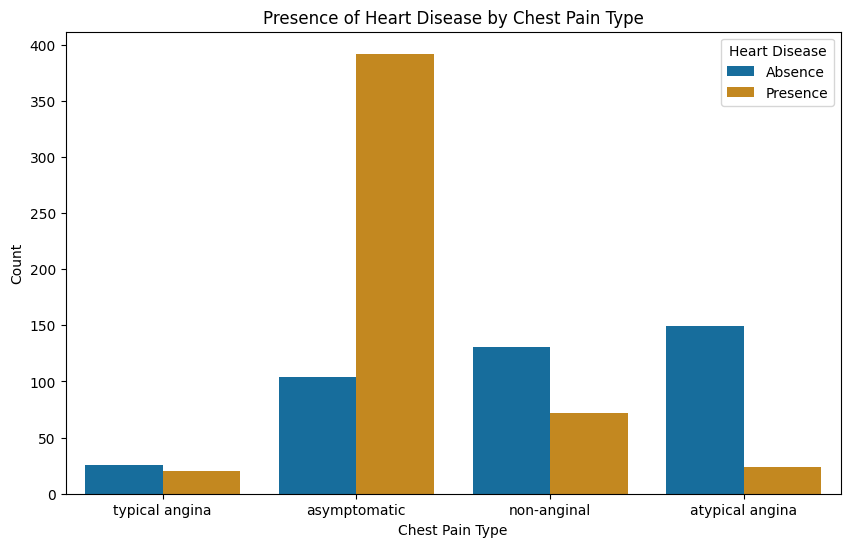

In [ ]:
# Box plotting 'heart_disease' vs. 'cp'
sns.set_palette("colorblind")
plt.figure(figsize=(10, 6))
sns.countplot(data=heart, x='cp', hue='heart_disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Presence of Heart Disease by Chest Pain Type')
plt.legend(title='Heart Disease', labels=['Absence', 'Presence'])
plt.show()

**Visualizing 'thalch' based on 'age'**

In [ ]:
# Visualizing 'thalch' vs age, colored by heart disease presence
fig = px.scatter(heart, x='age', y='thalch', color='heart_disease',
                 title='Max Heart Rate vs Age by Heart Disease Presence',
                 labels={'thalch':'Max Heart Rate', 'age':'Age'},
                 color_continuous_scale=px.colors.sequential.Cividis)
fig.show()

# Preparing the data for ML

First, I converted the data to be numerical so it could fit the ML models. Secondly, I defined the 'target variable', which is whether a patient has or doesn't have heart disease. Standardizing and checking imbalance is crucial to avoid the most possible for imbalances and low performance of the models. I used SMOTE to "fill the gap" and balance the training set, which had a clear imbalance. Last but not least, I handled the features using feature importance analysis, PCA and a correlation matrix.

In [ ]:
# Converting the data to numerical to fit in the ML models
# Label encoding for binary categorical variables
binary_columns = ['sex', 'fbs', 'exang']
label_encoder = LabelEncoder()
for col in binary_columns:
    heart[col] = label_encoder.fit_transform(heart[col])

# One-hot encoding for non-binary categorical variables
# Dropping one of the columns to avoid the dummy variable trap
non_binary_columns = ['cp', 'restecg']
heart = pd.get_dummies(heart, columns=non_binary_columns, drop_first=True)

# Check the transformed dataset
heart.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,heart_disease,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality
0,63,1,145.0,233.0,1,150.0,0,2.3,0,0,0,1,0,0
1,67,1,160.0,286.0,0,108.0,1,1.5,1,0,0,0,0,0
2,67,1,120.0,229.0,0,129.0,1,2.6,1,0,0,0,0,0
3,37,1,130.0,250.0,0,187.0,0,3.5,0,0,1,0,1,0
4,41,0,130.0,204.0,0,172.0,0,1.4,0,1,0,0,0,0


In [ ]:
# Separating features and target variable
X = heart.drop(columns=['heart_disease'])
y = heart['heart_disease']

In [ ]:
# Applying scaling to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Splitting the scaled data into training, validation and test sets
# Splitting the data into training and temporary sets (60% training, 40% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.6, random_state=42)

# Splitting the temporary set into validation and test sets (50% validation, 50% test of the temp set)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

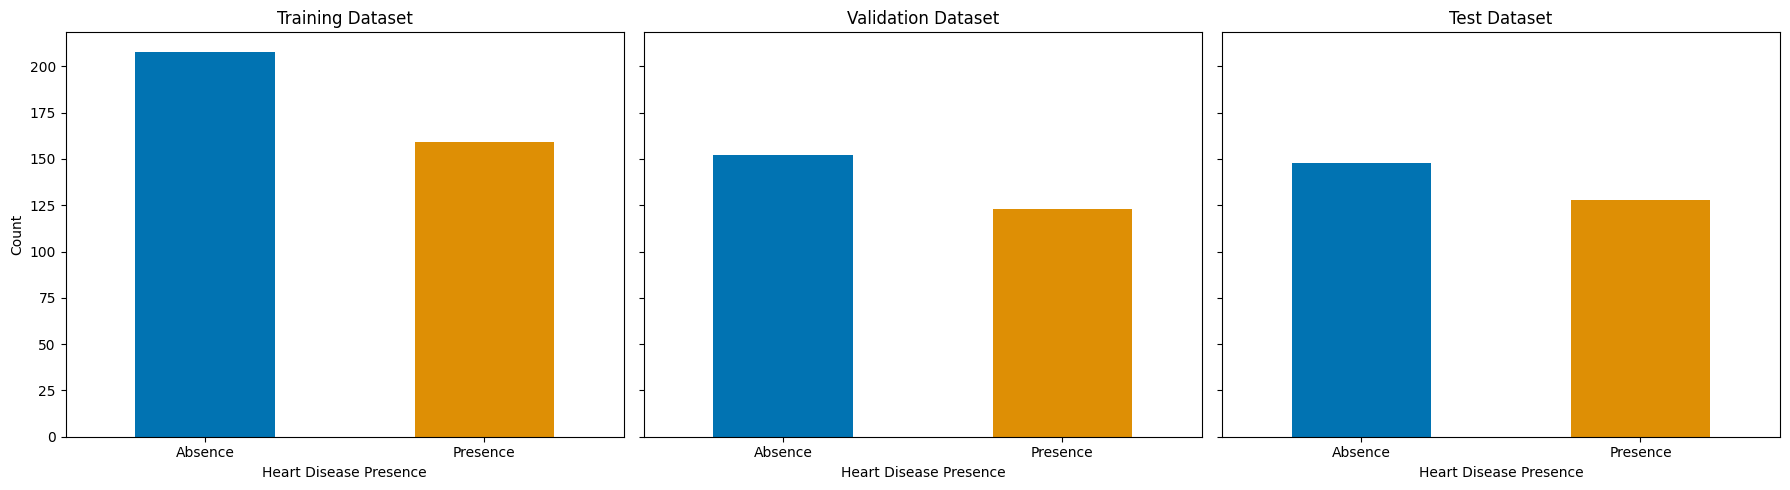

In [ ]:
# Checking imbalance between absence and presence of heart disease
# Defining the target variable
target_variable = 'heart_disease'

# Defining colors for class values 0 and 1
colors = ['#1f77b4', '#ff7f0e']

# Defining the visualization palette
colors = sns.color_palette("colorblind")

# Visualizing the splits using bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
dataset_names = ['Training', 'Validation', 'Test']
datasets_y = [y_train, y_validation, y_test]

for i, dataset_y in enumerate(datasets_y):
    dataset_y.value_counts().plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(f'{dataset_names[i]} Dataset')
    axes[i].set_xlabel('Heart Disease Presence')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Absence', 'Presence'], rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# Applying SMOTE to the training data
# Initializing SMOTE
smote = SMOTE(random_state=42)

# Applying SMOTE on the training data
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train.shape

(416, 13)

In [ ]:
# Feature importance using RandomForestClassifier
# Training a Random Forest Classifier for feature importance analysis
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Getting feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Creating a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting the DataFrame based on importance
feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

feature_importances_df

,Feature,Importance
3,chol,0.183454
7,oldpeak,0.152019
5,thalch,0.131784
0,age,0.108255
6,exang,0.105815
2,trestbps,0.083721
8,cp_atypical angina,0.070262
1,sex,0.047686
9,cp_non-anginal,0.044065
4,fbs,0.021618


The feature importance analysis, based on a Random Forest Classifier shows how each feature contributes to the prediction of heart disease presence.

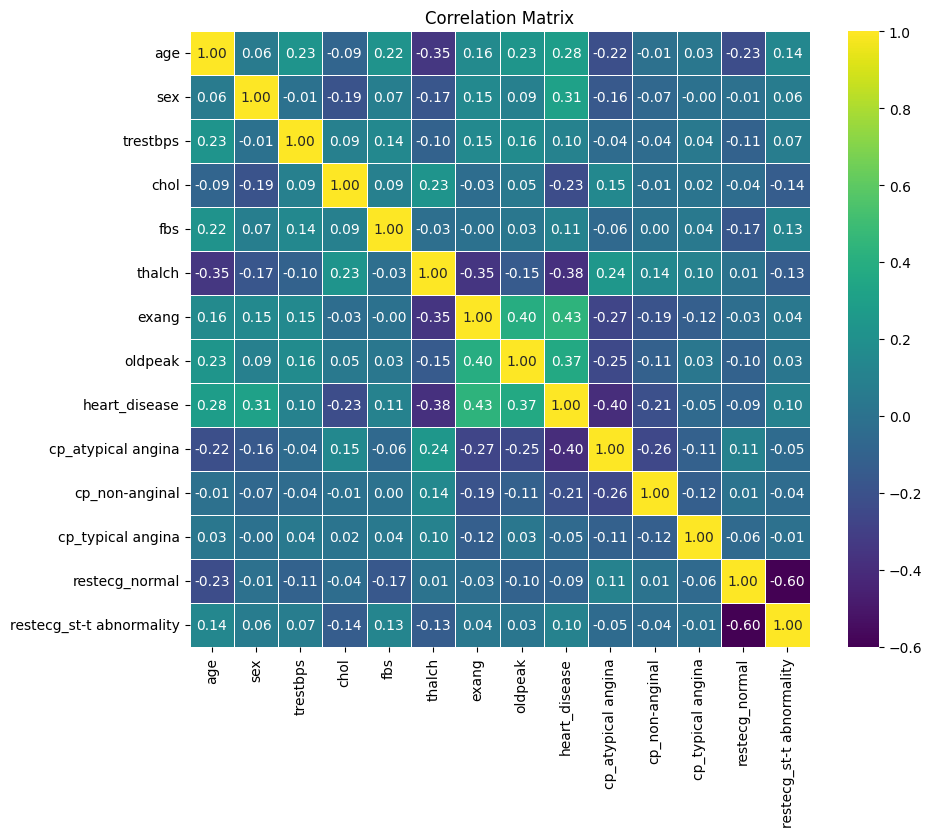

In [ ]:
# Correlation matrix
correlation_matrix = heart.corr()

# Displaying the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# PCA analysis to combine features
# Retaining 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Number of components chosen by PCA
n_components = pca.n_components_

# Variance ratio by each component
variance_ratio = pca.explained_variance_ratio_

(n_components, variance_ratio)

(12,
 array([0.18579876, 0.12335549, 0.10429488, 0.0953063 , 0.08383663,
        0.07853447, 0.07115633, 0.06134351, 0.05131127, 0.04990849,
        0.03692853, 0.03255233]))

# 4 ML models

**Support Vector Classifier**

**Accuracy 80%, precision 83% for patients with heart disease**

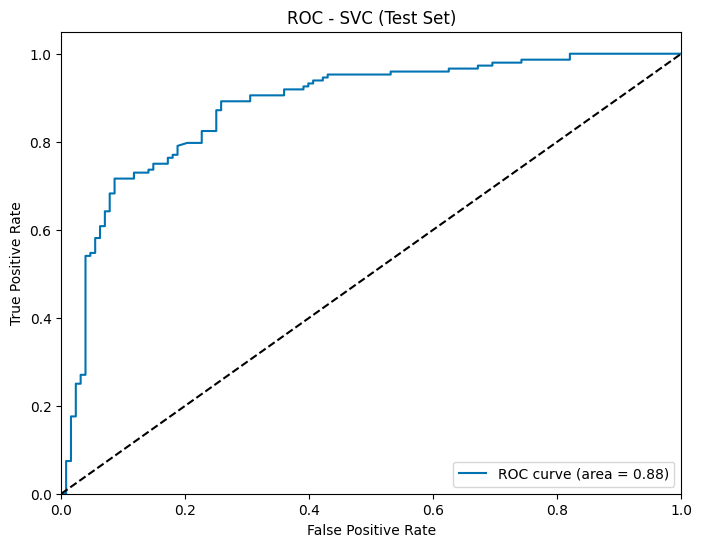

('              precision    recall  f1-score   support\n\n           0       0.76      0.81      0.79       128\n           1       0.83      0.78      0.81       148\n\n    accuracy                           0.80       276\n   macro avg       0.80      0.80      0.80       276\nweighted avg       0.80      0.80      0.80       276\n',
 0.8802787162162162)

In [ ]:
# Initializing the SVC model
svc_model = SVC(probability=True, random_state=42)

# Training the model on the training data
svc_model.fit(X_train, y_train)

# Predicting on the validation set
y_pred_test_svc = svc_model.predict(X_test)
y_pred_proba_test_svc = svc_model.predict_proba(X_test)[:, 1]

# Generating a classification report
class_report_test_svc = classification_report(y_test, y_pred_test_svc)

# Calculating ROC AUC score
roc_auc_test_svc = roc_auc_score(y_test, y_pred_proba_test_svc)

# Plotting ROC curve
fpr_test_svc, tpr_test_svc, thresholds_test_svc = roc_curve(y_test, y_pred_proba_test_svc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_svc, tpr_test_svc, label=f'ROC curve (area = {roc_auc_test_svc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - SVC (Test Set)')
plt.legend(loc="lower right")
plt.show()

(class_report_test_svc, roc_auc_test_svc)

**Random Forest Classifier**

**Accuracy 83%, precision 84% for patients with heart disease**

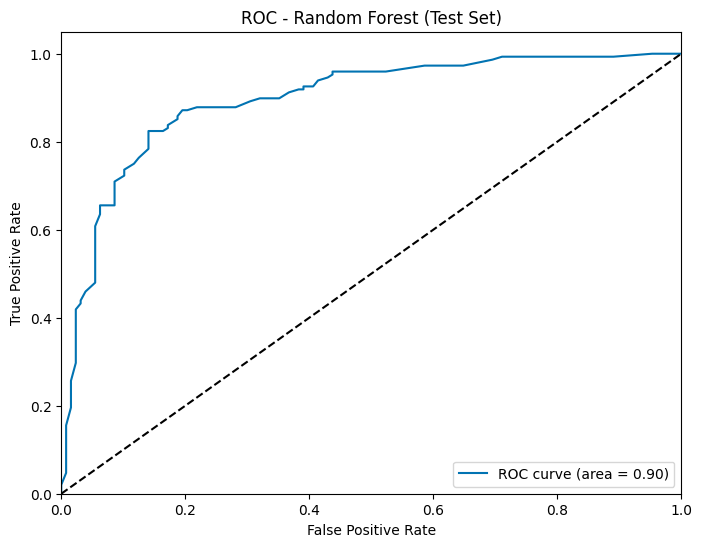

('              precision    recall  f1-score   support\n\n           0       0.83      0.81      0.82       128\n           1       0.84      0.85      0.85       148\n\n    accuracy                           0.83       276\n   macro avg       0.83      0.83      0.83       276\nweighted avg       0.83      0.83      0.83       276\n',
 0.8951383023648647)

In [ ]:
# Initializing the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Predicting on the validation set
y_pred_test_rf = rf_model.predict(X_test)
y_pred_proba_test_rf = rf_model.predict_proba(X_test)[:, 1]

# Generating a classification report
class_report_test_rf = classification_report(y_test, y_pred_test_rf)

# Calculating ROC AUC score
roc_auc_test_rf = roc_auc_score(y_test, y_pred_proba_test_rf)

# Plotting ROC curve
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test, y_pred_proba_test_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_rf, tpr_test_rf, label=f'ROC curve (area = {roc_auc_test_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest (Test Set)')
plt.legend(loc="lower right")
plt.show()

(class_report_test_rf, roc_auc_test_rf)

**Neural Network Classification**

**Accuracy 82%, precision 84% for patients with heart disease**

9/9 [==============================] - 0s 3ms/step


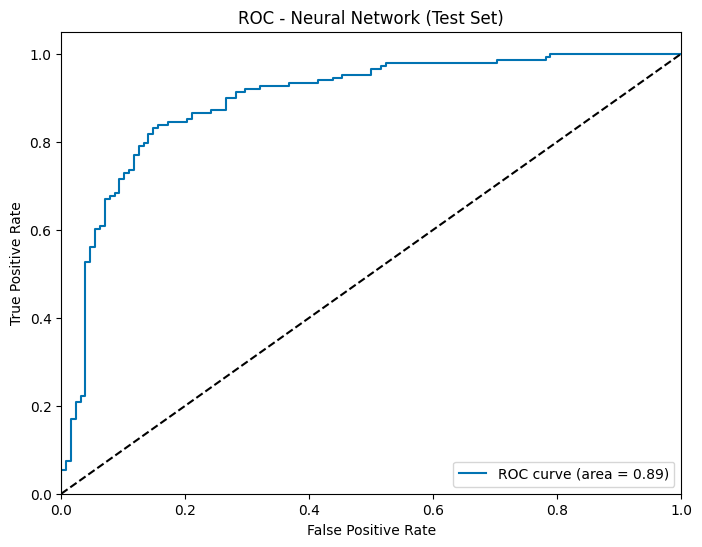

('              precision    recall  f1-score   support\n\n           0       0.81      0.85      0.83       128\n           1       0.87      0.82      0.84       148\n\n    accuracy                           0.84       276\n   macro avg       0.84      0.84      0.84       276\nweighted avg       0.84      0.84      0.84       276\n',
 0.8943201013513514)

In [ ]:
# Defining the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model on the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

# Predicting on the test set
y_pred_test_nn = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to class labels
y_pred_proba_test_nn = model.predict(X_test)

# Generating a classification report
class_report_test_nn = classification_report(y_test, y_pred_test_nn)

# Calculating ROC AUC score
roc_auc_test_nn = roc_auc_score(y_test, y_pred_proba_test_nn)

# Plotting ROC curve
fpr_test_nn, tpr_test_nn, thresholds_test_nn = roc_curve(y_test, y_pred_proba_test_nn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_nn, tpr_test_nn, label=f'ROC curve (area = {roc_auc_test_nn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Neural Network (Test Set)')
plt.legend(loc="lower right")
plt.show()

(class_report_test_nn, roc_auc_test_nn)

**Logistic Regression**

**Accuracy 82%, precision 86% for patients with heart disease**

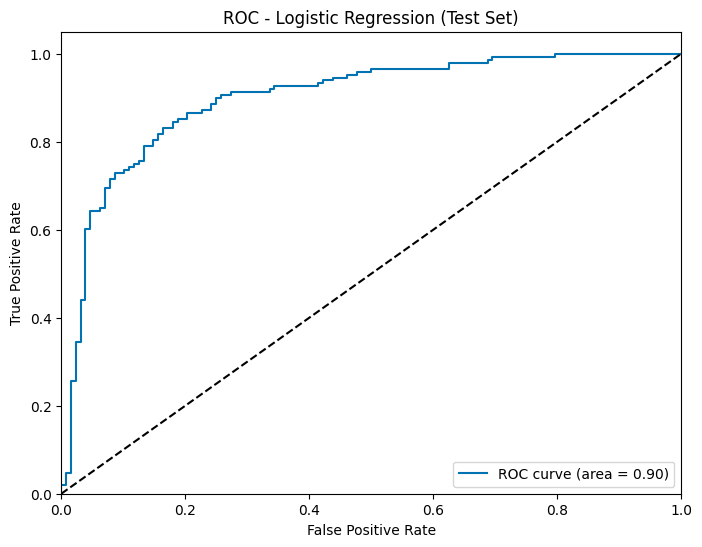

('              precision    recall  f1-score   support\n\n           0       0.79      0.84      0.82       128\n           1       0.86      0.80      0.83       148\n\n    accuracy                           0.82       276\n   macro avg       0.82      0.82      0.82       276\nweighted avg       0.82      0.82      0.82       276\n',
 0.8985958614864865)

In [ ]:
# Initializing the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Training the model on the training data
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_test_logistic = logistic_model.predict(X_test)
y_pred_proba_test_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Generating a classification report
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

class_report_test_logistic = classification_report(y_test, y_pred_test_logistic)

# Calculating ROC AUC score
roc_auc_test_logistic = roc_auc_score(y_test, y_pred_proba_test_logistic)

# Plotting ROC curve
fpr_test_logistic, tpr_test_logistic, thresholds_test_logistic = roc_curve(y_test, y_pred_proba_test_logistic)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test_logistic, tpr_test_logistic, label=f'ROC curve (area = {roc_auc_test_logistic:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Logistic Regression (Test Set)')
plt.legend(loc="lower right")
plt.show()

(class_report_test_logistic, roc_auc_test_logistic)

# Hyperparameter Tuning

In order to improve the models, I took hyperparameter tuning for each model separately.


**SVC model**
* *'C':* regularization parameter.
* *'kernel':* the pattern analysis method, either linear, sigmoid, etc.
* *'gamma':* the kernel coefficient.


**I managed to raise the accuracy from 80% to 84%**

In [ ]:
# Define parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initializing the GridSearchCV object with SVC model and parameter grid
grid_search_svc = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svc, cv=5, scoring='roc_auc', verbose=1)

# Fitting GridSearchCV
grid_search_svc.fit(X_train, y_train)

# Accessing the best SVC model
best_svc_model = grid_search_svc.best_estimator_

# Predicting on the test set with the best model
y_pred_test_best_svc = best_svc_model.predict(X_test)
y_pred_proba_test_best_svc = best_svc_model.predict_proba(X_test)[:, 1]

# Generating a classification report for the best model
class_report_test_best_svc = classification_report(y_test, y_pred_test_best_svc)

# Calculating ROC AUC score for the best model
roc_auc_test_best_svc = roc_auc_score(y_test, y_pred_proba_test_best_svc)

# Outputting the classification report and ROC AUC score for the best model
print(class_report_test_best_svc)
print(f"ROC AUC Score (Best SVC): {roc_auc_test_best_svc:.2f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       128
           1       0.87      0.84      0.85       148

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276

ROC AUC Score (Best SVC): 0.91


**Random Forest Classifier**
* *'n_estimators':* the number of trees in the forest.
* *'max_depth':* the max depth of the tree.
* *'min_samples_split':* the min number of samples required to split an internal mode.
* *'min_samples_leaf':* the min muber of samples required to be at a leaf node.

**I managed to raise the accuracy from 83% to 84%**

In [ ]:
# Defining parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing the GridSearchCV object with RandomForestClassifier model and parameter grid
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc', verbose=1)

# Fitting GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Accessing the best RandomForestClassifier model
best_rf_model = grid_search_rf.best_estimator_

# Predicting on the test set with the best model
y_pred_test_best_rf = best_rf_model.predict(X_test)
y_pred_proba_test_best_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Generating a classification report for the best model
class_report_test_best_rf = classification_report(y_test, y_pred_test_best_rf)

# Calculating ROC AUC score for the best model
roc_auc_test_best_rf = roc_auc_score(y_test, y_pred_proba_test_best_rf)

# Outputting the classification report and ROC AUC score for the best model
print("Classification Report (Best RandomForestClassifier):")
print(class_report_test_best_rf)
print(f"ROC AUC Score (Best RandomForestClassifier): {roc_auc_test_best_rf:.2f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Classification Report (Best RandomForestClassifier):
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       128
           1       0.85      0.85      0.85       148

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

ROC AUC Score (Best RandomForestClassifier): 0.90


**Neural Network Classification**

* The number of layers and neurons in each layer.
* Activation functions.
* Optimizer.
* Learning rate.
* Batch size and number of epochs.

**I didn't manage to score a higher accuracy**

In [ ]:
# Defining the model builder function for hyperparameter tuning
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(
        units=hp.Int('units_layer_1', min_value=32, max_value=512, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(
            units=hp.Int(f'units_layer_{i+2}', min_value=32, max_value=512, step=32),
            activation='relu'
        ))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    hp_optimizer = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    model.compile(optimizer=hp_optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initializing the hyperparameter search
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    hyperband_iterations=2,
    directory='my_dir',
    project_name='keras_tuner_demo'
)

# Starting the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)

# Getting the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluating the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
y_pred_test_nn = (best_model.predict(X_test) > 0.5).astype(int)
y_pred_proba_test_nn = best_model.predict(X_test)

# Generating a classification report for the best model
class_report_test_nn = classification_report(y_test, y_pred_test_nn)

# Calculating ROC AUC score for the best model
roc_auc_test_nn = roc_auc_score(y_test, y_pred_proba_test_nn)

# Outputting the classification report and ROC AUC score for the best model
print("Classification Report (Best Neural Network Model):")
print(class_report_test_nn)
print(f"ROC AUC Score (Best Neural Network Model): {roc_auc_test_nn:.2f}")

Reloading Tuner from my_dir/keras_tuner_demo/tuner0.json
9/9 [==============================] - 0s 3ms/step
Classification Report (Best Neural Network Model):
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       128
           1       0.84      0.76      0.80       148

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276

ROC AUC Score (Best Neural Network Model): 0.87


**Logistic Regression**
* *'C':* regularization parameter.
* *'solver':* algorithms to use in the optimization problem, either newton-cg, lbfgs, liblinear, sag, saga.
* *penalty':* specifying the norm of the penalty ('l2', 'l1', 'elasticnet', 'none').

**I managed to raise the accuracy from 82% to 84%**

In [ ]:
# Defining parameter grid for LogisticRegression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2']
}

# Initializing the GridSearchCV object with LogisticRegression model and parameter grid
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring='roc_auc', verbose=1)

# Fitting GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Accessing the best LogisticRegression model
best_lr_model = grid_search_lr.best_estimator_

# Predicting on the test set with the best model
y_pred_test_best_lr = best_lr_model.predict(X_test)
y_pred_proba_test_best_lr = best_lr_model.predict_proba(X_test)[:, 1]

# Generating a classification report for the best model
class_report_test_best_lr = classification_report(y_test, y_pred_test_best_lr)

# Calculating ROC AUC score for the best model
roc_auc_test_best_lr = roc_auc_score(y_test, y_pred_proba_test_best_lr)

# Outputting the classification report and ROC AUC score for the best model
print("Classification Report (Best LogisticRegression):")
print(class_report_test_best_lr)
print(f"ROC AUC Score (Best LogisticRegression): {roc_auc_test_best_lr:.2f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Classification Report (Best LogisticRegression):
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       128
           1       0.89      0.80      0.84       148

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

ROC AUC Score (Best LogisticRegression): 0.90
